# LETS GROW MORE DATA SCIENCE INTERNSHIP BEGINNER LEVEL TASK
LGMVIP (March - 2022)

BEGINNER LEVEL TASK

TASK 2 - PREDICTION USING DECISION TREE ALGORITM (Second Task)

AUTHOR- DEVYANI NITIN MAHAJAN

# 1) Importing Essential Libraries and Reading file

In [4]:
import pandas as pd
import numpy as np
import io
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
print(data)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

In [5]:
import matplotlib. pyplot as plt
import matplotlib
%matplotlib inline

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [7]:
print(data. shape)

print(data.isnull().values.any())


(2035, 8)
False


In [8]:
data.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  

# 2] Plotting the True Adjusted Close Value 

<AxesSubplot:>

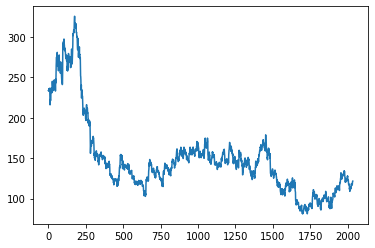

In [9]:
data['Close'].plot()

# 3] Setting the Target Variable and Selecting the Features

In [10]:
output_var = pd.DataFrame(data['Close'])

In [11]:
features = ['Open', 'High', 'Low', 'Turnover (Lacs)']

# 4]Scaling

In [13]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()

,Open,High,Low,Turnover (Lacs)
0,0.620235,0.622688,0.621560,0.127882
1,0.622263,0.626144,0.625285,0.212192
2,0.644363,0.639154,0.631078,0.093535
3,0.617194,0.625940,0.629009,0.098117
4,0.618208,0.635902,0.623836,0.142907


# 5] Training and Testing Data

In [14]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [15]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

# 6] training the model

In [21]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 1s 1ms/step - loss: 25837.7402
Epoch 2/100
232/232 [==============================] - 0s 1ms/step - loss: 25315.6973
Epoch 3/100
232/232 [==============================] - 0s 1ms/step - loss: 23728.7637
Epoch 4/100
232/232 [==============================] - 0s 1ms/step - loss: 20947.3164
Epoch 5/100
232/232 [==============================] - 0s 1ms/step - loss: 17457.1055
Epoch 6/100
232/232 [==============================] - 0s 1ms/step - loss: 13790.8955
Epoch 7/100
232/232 [==============================] - 0s 1ms/step - loss: 10322.0039
Epoch 8/100
232/232 [==============================] - 0s 1ms/step - loss: 7288.4346
Epoch 9/100
232/232 [==============================] - 0s 1ms/step - loss: 4822.2588
Epoch 10/100
232/232 [==============================] - 0s 1ms/step - loss: 2964.9160
Epoch 11/100
232/232 [==============================] - 0s 1ms/step - loss: 1680.5514
Epoch 12/100
232/232 [==============================] - 

# 7] LSTM PREICTION

In [22]:
y_pred= lstm.predict(X_test)
y_pred

array([[101.85533 ],
       [102.80684 ],
       [107.079704],
       [107.43019 ],
       [105.73742 ],
       [105.17118 ],
       [101.24136 ],
       [ 98.70192 ],
       [ 97.19061 ],
       [ 97.06474 ],
       [ 97.39317 ],
       [ 97.95897 ],
       [ 99.11937 ],
       [ 98.40126 ],
       [ 97.68754 ],
       [ 98.16777 ],
       [ 98.39911 ],
       [ 98.0091  ],
       [ 97.92946 ],
       [ 99.45963 ],
       [ 99.12596 ],
       [102.36329 ],
       [ 99.51703 ],
       [ 95.93213 ],
       [ 95.62384 ],
       [ 90.676956],
       [ 89.3329  ],
       [ 90.58028 ],
       [ 90.86111 ],
       [ 90.211975],
       [ 87.908394],
       [ 88.55104 ],
       [ 92.44269 ],
       [ 95.970146],
       [ 96.24694 ],
       [ 95.13785 ],
       [ 98.644005],
       [ 97.365715],
       [ 94.953156],
       [ 94.76117 ],
       [ 93.02232 ],
       [ 89.4548  ],
       [ 87.22667 ],
       [ 90.66196 ],
       [ 94.5349  ],
       [ 96.50452 ],
       [ 95.88928 ],
       [ 96.1

# 8] True vs Predicted Adj Close Value – LSTM

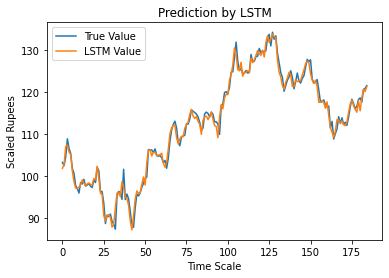

In [23]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()
